In [ ]:
# %%

# Function to get user input for the number of lines
def gret_sigma_value():
    while True:
        try:
            sigma = float(input("Enter SIGMA: "))
            if sigma > 0 :
                return sigma
            else:
                print("Please enter a value between 0 and 1.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

# Function to get user input for the function type
def get_LM_type():
    while True:
        try:
            L_median = int(input("Enter L median: "))
            if L_median > 0 :
                return L_median
            else :
                print("Please enter a positive value.")
        except ValueError :
            print("BOOOOOh.")


lengths =  np.linspace(5,1000,1000)
ar = 15
#sigma = gret_sigma_value()
#L_median = get_LM_type()

L_median = 100
for sigma in [0.1, 0.3, 0.7]:

    dist = lognorm_pdf(lengths, sigma, L_median)
    V = np.pi*( (0.5*lengths/ar)**2)*lengths
    eff_dist = V*dist
    eff_dist = eff_dist / sum(eff_dist)


    #### CREATE CURVE

    t = np.linspace(0,2,2000)
    T = 300

    def rot_diff_par(l,AR) :
        
        eta = np.exp(-2.3568+617.2/(T-179.414))*10**-2   #2*10**(-1)	  
        kT = 4.11*10**(-21)/300 * T
        S = np.log(AR+np.sqrt(AR**2-1)) / np.sqrt(AR**2-1)
        A = (3*kT)/(np.pi*eta*l**3)
        G = (0.5*AR**2*( ((2*AR**2-1) / AR)*S-1) ) / (AR**2-1)
        D = A*G
        return D


    D_l = rot_diff_par(lengths*10**(-9),ar)

    # effecctive relax
    exps = []
    for i in range(len(D_l)):
        exps.append(np.exp(-6*D_l[i]*t) )

    w_exps = []
    for i in range(len(eff_dist)) :
        w_exps.append(eff_dist[i]*exps[i])


    relax = []
    somma_exps = 0
    for j in range(len(t)):
        for i in range(len(D_l)):
            somma_exps = somma_exps  + w_exps[i][j]
        relax.append(somma_exps)
        somma_exps = 0

    relax_corrected_EG = relax #+ 0.1*np.exp(-(6*0.4*t)**0.8)
    relax_corrected_EG = relax_corrected_EG/relax_corrected_EG[0]

    SE, D_eff, alpha = SE_from_TEBcurve(t,relax_corrected_EG)

    ax1.plot(lengths,dist,  label = fr' $ \sigma $={sigma} $L_M$={L_median}' )
    ax2.plot(t,relax_corrected_EG, label = fr'$\alpha$={alpha}, D_eff={D_eff}' )
    ax2.plot(t,SE,':')



ax2.set_xlabel('x')
ax2.set_ylabel('normalized biref')
ax2.legend()


ax1.set_xlabel('x')
ax1.set_ylabel('size dist')
ax1.legend()

plt.show()

NameError: name 'np' is not defined

In [ ]:
# %%

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.optimize import curve_fit
import os
import glob
from functions import *
from scipy.stats import skewnorm
from ipywidgets import interactive
from tkinter import filedialog
def lognorm_pdf(x, sig, LM):
    return (1/(x*sig*np.sqrt(2*np.pi)))*np.exp( -np.log(x/LM)**2/(2*sig**2) )

def st_exponential(x, b, alpha): # stretched exponential
     return np.exp( -(b * x)**alpha) # a_0 and c_0 are defined later in the code

def SE_from_TEBcurve(time,curve):
    if curve[0] != 1:
        curve = curve/curve[0]
    params, covariance = curve_fit(st_exponential,time,curve)
       # Extract the fitted parameters
    b_fit, alpha_fit = params
    var_b, var_alpha = np.diag(covariance)
    err_b = np.sqrt(var_b)
    err_alpha = np.sqrt(var_alpha)

    # Generate the fitted curve using the parameters
    fit_curve = st_exponential(time, b_fit, alpha_fit)
    
    return fit_curve, b_fit/6, alpha_fit

sigmas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
L_median = 120

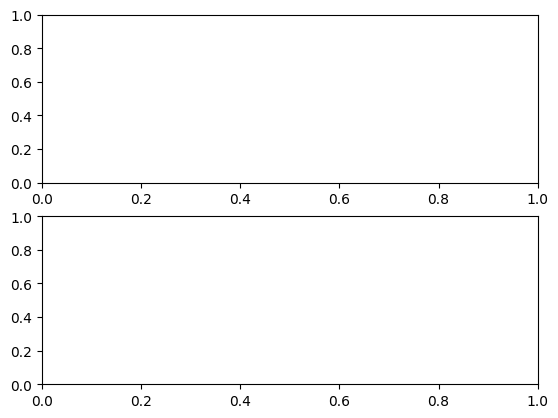

In [ ]:
# %% CREATING DISTRIBUTION

fig, (ax1, ax2) = plt.subplots( 2,1)
# for sigma in sigmas :

#     lengths =  np.linspace(5,1000,1000)
#     ar = 15


#     dist = lognorm_pdf(lengths, sigma, L_median)
#     V = np.pi*( (0.5*lengths/ar)**2)*lengths
#     eff_dist = V*dist
#     eff_dist = eff_dist / sum(eff_dist)


#     #### CREATE CURVE

#     t = np.linspace(0,2,1000)

#     T = 300



#     def rot_diff_par(l,AR) :
        
#         eta = np.exp(-2.3568+617.2/(T-179.414))*10**-2   #2*10**(-1)	  
#         kT = 4.11*10**(-21)/300 * T
#         S = np.log(AR+np.sqrt(AR**2-1)) / np.sqrt(AR**2-1)
#         A = (3*kT)/(np.pi*eta*l**3)
#         G = (0.5*AR**2*( ((2*AR**2-1) / AR)*S-1) ) / (AR**2-1)
#         D = A*G
#         return D


#     D_l = rot_diff_par(lengths*10**(-9),ar)

#     # effecctive relax
#     exps = []
#     for i in range(len(D_l)):
#         exps.append(np.exp(-6*D_l[i]*t) )

#     w_exps = []
#     for i in range(len(eff_dist)) :
#         w_exps.append(eff_dist[i]*exps[i])


#     relax = []
#     somma_exps = 0
#     for j in range(len(t)):
#         for i in range(len(D_l)):
#             somma_exps = somma_exps  + w_exps[i][j]
#         relax.append(somma_exps)
#         somma_exps = 0

#     relax_corrected_EG = relax + 0.1*np.exp(-(6*0.4*t)**0.8)
#     relax_corrected_EG = relax_corrected_EG/relax_corrected_EG[0]



#     ax1.plot(lengths,dist,  label = fr' $ \sigma $={sigma} $L_M$={L_median}' )
#     ax2.plot(t,relax_corrected_EG)
 


# ax2.set_xlabel('x')
# ax2.set_ylabel('')



# ax1.set_xlabel('x')
# ax1.set_ylabel('size dist')
# ax1.legend()

# plt.show()

In [ ]:
# %%

# Function to get user input for the number of lines
def gret_sigma_value():
    while True:
        try:
            sigma = float(input("Enter SIGMA: "))
            if sigma > 0 :
                return sigma
            else:
                print("Please enter a value between 0 and 1.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

# Function to get user input for the function type
def get_LM_type():
    while True:
        try:
            L_median = int(input("Enter L median: "))
            if L_median > 0 :
                return L_median
            else :
                print("Please enter a positive value.")
        except ValueError :
            print("BOOOOOh.")


lengths =  np.linspace(5,1000,1000)
ar = 15
#sigma = gret_sigma_value()
#L_median = get_LM_type()

L_median = 100
for sigma in [0.1, 0.3, 0.7]:

    dist = lognorm_pdf(lengths, sigma, L_median)
    V = np.pi*( (0.5*lengths/ar)**2)*lengths
    eff_dist = V*dist
    eff_dist = eff_dist / sum(eff_dist)


    #### CREATE CURVE

    t = np.linspace(0,2,2000)
    T = 300

    def rot_diff_par(l,AR) :
        
        eta = np.exp(-2.3568+617.2/(T-179.414))*10**-2   #2*10**(-1)	  
        kT = 4.11*10**(-21)/300 * T
        S = np.log(AR+np.sqrt(AR**2-1)) / np.sqrt(AR**2-1)
        A = (3*kT)/(np.pi*eta*l**3)
        G = (0.5*AR**2*( ((2*AR**2-1) / AR)*S-1) ) / (AR**2-1)
        D = A*G
        return D


    D_l = rot_diff_par(lengths*10**(-9),ar)

    # effecctive relax
    exps = []
    for i in range(len(D_l)):
        exps.append(np.exp(-6*D_l[i]*t) )

    w_exps = []
    for i in range(len(eff_dist)) :
        w_exps.append(eff_dist[i]*exps[i])


    relax = []
    somma_exps = 0
    for j in range(len(t)):
        for i in range(len(D_l)):
            somma_exps = somma_exps  + w_exps[i][j]
        relax.append(somma_exps)
        somma_exps = 0

    relax_corrected_EG = relax #+ 0.1*np.exp(-(6*0.4*t)**0.8)
    relax_corrected_EG = relax_corrected_EG/relax_corrected_EG[0]

    SE, D_eff, alpha = SE_from_TEBcurve(t,relax_corrected_EG)

    ax1.plot(lengths,dist,  label = fr' $ \sigma $={sigma} $L_M$={L_median}' )
    ax2.plot(t,relax_corrected_EG, label = fr'$\alpha$={alpha}, D_eff={D_eff}' )
    ax2.plot(t,SE,':')



ax2.set_xlabel('x')
ax2.set_ylabel('normalized biref')
ax2.legend()


ax1.set_xlabel('x')
ax1.set_ylabel('size dist')
ax1.legend()

plt.show()

<ipython-input-2-758ba4f16e8a>:16: RuntimeWarning: divide by zero encountered in power
  return np.exp( -(b * x)**alpha) # a_0 and c_0 are defined later in the code


In [ ]:
# %%

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Function to generate and plot the sine or cosine wave
def plot_wave(amplitude=1, frequency=1, phase=0, func_type='sine'):
    x = np.linspace(0, 10, 1000)
    if func_type == 'sine':
        y = amplitude * np.sin(frequency * x + phase)
    else:
        y = amplitude * np.cos(frequency * x + phase)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f'{func_type.capitalize()} Wave')
    plt.title(f'{func_type.capitalize()} Wave')
    plt.xlabel('x')
    plt.ylabel(f'{func_type}(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive widgets
amplitude_slider = widgets.FloatSlider(value=1, min=0.1, max=5, step=0.1, description='Amplitude:')
frequency_slider = widgets.FloatSlider(value=1, min=0.1, max=5, step=0.1, description='Frequency:')
phase_slider = widgets.FloatSlider(value=0, min=0, max=2*np.pi, step=0.1, description='Phase:')
func_type_dropdown = widgets.Dropdown(options=['sine', 'cosine'], value='sine', description='Function:')

# Use interact to create an interactive plot
interact(plot_wave, amplitude=amplitude_slider, frequency=frequency_slider, phase=phase_slider, func_type=func_type_dropdown)

interactive(children=(FloatSlider(value=1.0, description='Amplitude:', max=5.0, min=0.1), FloatSlider(value=1.…

<function __main__.plot_wave(amplitude=1, frequency=1, phase=0, func_type='sine')>

In [ ]:
# %%

# Function to get user input for the number of lines
def gret_sigma_value():
    while True:
        try:
            sigma = float(input("Enter SIGMA: "))
            if sigma > 0 :
                return sigma
            else:
                print("Please enter a value between 0 and 1.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

# Function to get user input for the function type
def get_LM_type():
    while True:
        try:
            L_median = int(input("Enter L median: "))
            if L_median > 0 :
                return L_median
            else :
                print("Please enter a positive value.")
        except ValueError :
            print("BOOOOOh.")

def plot_dist_and_fit(L_median = 100, sigma = 1 ):
    lengths =  np.linspace(5,1000,1000)
    ar = 15
    #sigma = gret_sigma_value()
    #L_median = get_LM_type()

    L_median = 100


    dist = lognorm_pdf(lengths, sigma, L_median)
    V = np.pi*( (0.5*lengths/ar)**2)*lengths
    eff_dist = V*dist
    eff_dist = eff_dist / sum(eff_dist)


    #### CREATE CURVE

    t = np.linspace(0,2,2000)
    T = 300

    def rot_diff_par(l,AR) :
        
        eta = np.exp(-2.3568+617.2/(T-179.414))*10**-2   #2*10**(-1)	  
        kT = 4.11*10**(-21)/300 * T
        S = np.log(AR+np.sqrt(AR**2-1)) / np.sqrt(AR**2-1)
        A = (3*kT)/(np.pi*eta*l**3)
        G = (0.5*AR**2*( ((2*AR**2-1) / AR)*S-1) ) / (AR**2-1)
        D = A*G
        return D


    D_l = rot_diff_par(lengths*10**(-9),ar)

    # effecctive relax
    exps = []
    for i in range(len(D_l)):
        exps.append(np.exp(-6*D_l[i]*t) )

    w_exps = []
    for i in range(len(eff_dist)) :
        w_exps.append(eff_dist[i]*exps[i])


    relax = []
    somma_exps = 0
    for j in range(len(t)):
        for i in range(len(D_l)):
            somma_exps = somma_exps  + w_exps[i][j]
        relax.append(somma_exps)
        somma_exps = 0

    relax_corrected_EG = relax #+ 0.1*np.exp(-(6*0.4*t)**0.8)
    relax_corrected_EG = relax_corrected_EG/relax_corrected_EG[0]

    SE, D_eff, alpha = SE_from_TEBcurve(t,relax_corrected_EG)

    ax1.plot(lengths,dist,  label = fr' $ \sigma $={sigma} $L_M$={L_median}' )
    ax2.plot(t,relax_corrected_EG, label = fr'$\alpha$={alpha}, D_eff={D_eff}' )
    ax2.plot(t,SE,':')



    ax2.set_xlabel('x')
    ax2.set_ylabel('normalized biref')
    ax2.legend()


    ax1.set_xlabel('x')
    ax1.set_ylabel('size dist')
    ax1.legend()

    plt.show()


# Create interactive widgets
LM_slider = widgets.FloatSlider(value=100, min=5, max=200, step=5, description='L median:')
sigma_slider = widgets.FloatSlider(value=1, min=0.001, max=1, step=0.03, description='sigma:')

# Use interact to create an interactive plot
interact(plot_dist_and_fit, sigma=sigma_slider, L_median=LM_slider)

interactive(children=(FloatSlider(value=100.0, description='L median:', max=200.0, min=5.0, step=5.0), FloatSl…

<function __main__.plot_dist_and_fit(L_median=100, sigma=1)>

In [ ]:
# %%

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.optimize import curve_fit
import os
import glob
from functions import *
from scipy.stats import skewnorm
from ipywidgets import interactive
from tkinter import filedialog
def lognorm_pdf(x, sig, LM):
    return (1/(x*sig*np.sqrt(2*np.pi)))*np.exp( -np.log(x/LM)**2/(2*sig**2) )

def st_exponential(x, b, alpha): # stretched exponential
     return np.exp( -(b * x)**alpha) # a_0 and c_0 are defined later in the code

def SE_from_TEBcurve(time,curve):
    if curve[0] != 1:
        curve = curve/curve[0]
    params, covariance = curve_fit(st_exponential,time,curve)
       # Extract the fitted parameters
    b_fit, alpha_fit = params
    var_b, var_alpha = np.diag(covariance)
    err_b = np.sqrt(var_b)
    err_alpha = np.sqrt(var_alpha)

    # Generate the fitted curve using the parameters
    fit_curve = st_exponential(time, b_fit, alpha_fit)
    
    return fit_curve, b_fit/6, alpha_fit

sigmas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
L_median = 120

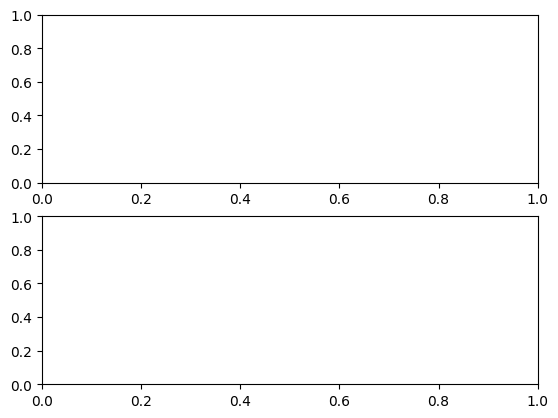

In [ ]:
# %% CREATING DISTRIBUTION

fig, (ax1, ax2) = plt.subplots( 2,1)
# for sigma in sigmas :

#     lengths =  np.linspace(5,1000,1000)
#     ar = 15


#     dist = lognorm_pdf(lengths, sigma, L_median)
#     V = np.pi*( (0.5*lengths/ar)**2)*lengths
#     eff_dist = V*dist
#     eff_dist = eff_dist / sum(eff_dist)


#     #### CREATE CURVE

#     t = np.linspace(0,2,1000)

#     T = 300



#     def rot_diff_par(l,AR) :
        
#         eta = np.exp(-2.3568+617.2/(T-179.414))*10**-2   #2*10**(-1)	  
#         kT = 4.11*10**(-21)/300 * T
#         S = np.log(AR+np.sqrt(AR**2-1)) / np.sqrt(AR**2-1)
#         A = (3*kT)/(np.pi*eta*l**3)
#         G = (0.5*AR**2*( ((2*AR**2-1) / AR)*S-1) ) / (AR**2-1)
#         D = A*G
#         return D


#     D_l = rot_diff_par(lengths*10**(-9),ar)

#     # effecctive relax
#     exps = []
#     for i in range(len(D_l)):
#         exps.append(np.exp(-6*D_l[i]*t) )

#     w_exps = []
#     for i in range(len(eff_dist)) :
#         w_exps.append(eff_dist[i]*exps[i])


#     relax = []
#     somma_exps = 0
#     for j in range(len(t)):
#         for i in range(len(D_l)):
#             somma_exps = somma_exps  + w_exps[i][j]
#         relax.append(somma_exps)
#         somma_exps = 0

#     relax_corrected_EG = relax + 0.1*np.exp(-(6*0.4*t)**0.8)
#     relax_corrected_EG = relax_corrected_EG/relax_corrected_EG[0]



#     ax1.plot(lengths,dist,  label = fr' $ \sigma $={sigma} $L_M$={L_median}' )
#     ax2.plot(t,relax_corrected_EG)
 


# ax2.set_xlabel('x')
# ax2.set_ylabel('')



# ax1.set_xlabel('x')
# ax1.set_ylabel('size dist')
# ax1.legend()

# plt.show()

In [ ]:
# %%

# Function to get user input for the number of lines
def gret_sigma_value():
    while True:
        try:
            sigma = float(input("Enter SIGMA: "))
            if sigma > 0 :
                return sigma
            else:
                print("Please enter a value between 0 and 1.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

# Function to get user input for the function type
def get_LM_type():
    while True:
        try:
            L_median = int(input("Enter L median: "))
            if L_median > 0 :
                return L_median
            else :
                print("Please enter a positive value.")
        except ValueError :
            print("BOOOOOh.")

def plot_dist_and_fit(L_median = 100, sigma = 1 ):
    lengths =  np.linspace(5,1000,1000)
    ar = 15
    #sigma = gret_sigma_value()
    #L_median = get_LM_type()

    L_median = 100


    dist = lognorm_pdf(lengths, sigma, L_median)
    V = np.pi*( (0.5*lengths/ar)**2)*lengths
    eff_dist = V*dist
    eff_dist = eff_dist / sum(eff_dist)


    #### CREATE CURVE

    t = np.linspace(0,2,2000)
    T = 300

    def rot_diff_par(l,AR) :
        
        eta = np.exp(-2.3568+617.2/(T-179.414))*10**-2   #2*10**(-1)	  
        kT = 4.11*10**(-21)/300 * T
        S = np.log(AR+np.sqrt(AR**2-1)) / np.sqrt(AR**2-1)
        A = (3*kT)/(np.pi*eta*l**3)
        G = (0.5*AR**2*( ((2*AR**2-1) / AR)*S-1) ) / (AR**2-1)
        D = A*G
        return D


    D_l = rot_diff_par(lengths*10**(-9),ar)

    # effecctive relax
    exps = []
    for i in range(len(D_l)):
        exps.append(np.exp(-6*D_l[i]*t) )

    w_exps = []
    for i in range(len(eff_dist)) :
        w_exps.append(eff_dist[i]*exps[i])


    relax = []
    somma_exps = 0
    for j in range(len(t)):
        for i in range(len(D_l)):
            somma_exps = somma_exps  + w_exps[i][j]
        relax.append(somma_exps)
        somma_exps = 0

    relax_corrected_EG = relax #+ 0.1*np.exp(-(6*0.4*t)**0.8)
    relax_corrected_EG = relax_corrected_EG/relax_corrected_EG[0]

    SE, D_eff, alpha = SE_from_TEBcurve(t,relax_corrected_EG)

    ax1.plot(lengths,dist,  label = fr' $ \sigma $={sigma} $L_M$={L_median}' )
    ax2.plot(t,relax_corrected_EG, label = fr'$\alpha$={alpha}, D_eff={D_eff}' )
    ax2.plot(t,SE,':')



    ax2.set_xlabel('x')
    ax2.set_ylabel('normalized biref')
    ax2.legend()


    ax1.set_xlabel('x')
    ax1.set_ylabel('size dist')
    ax1.legend()

    plt.show()


# Create interactive widgets
LM_slider = widgets.FloatSlider(value=100, min=5, max=200, step=5, description='L median:')
sigma_slider = widgets.FloatSlider(value=1, min=0.001, max=1, step=0.03, description='sigma:')

# Use interact to create an interactive plot
interact(plot_dist_and_fit, sigma=sigma_slider, L_median=LM_slider)

interactive(children=(FloatSlider(value=100.0, description='L median:', max=200.0, min=5.0, step=5.0), FloatSl…

<function __main__.plot_dist_and_fit(L_median=100, sigma=1)>

In [ ]:
# %%

# Function to get user input for the number of lines
def gret_sigma_value():
    while True:
        try:
            sigma = float(input("Enter SIGMA: "))
            if sigma > 0 :
                return sigma
            else:
                print("Please enter a value between 0 and 1.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

# Function to get user input for the function type
def get_LM_type():
    while True:
        try:
            L_median = int(input("Enter L median: "))
            if L_median > 0 :
                return L_median
            else :
                print("Please enter a positive value.")
        except ValueError :
            print("BOOOOOh.")

def plot_dist_and_fit(L_median = 100, sigma = 1 ):
    fig, (ax1, ax2) = plt.subplots( 2,1)
    lengths =  np.linspace(5,1000,1000)
    ar = 15
    #sigma = gret_sigma_value()
    #L_median = get_LM_type()

    L_median = 100


    dist = lognorm_pdf(lengths, sigma, L_median)
    V = np.pi*( (0.5*lengths/ar)**2)*lengths
    eff_dist = V*dist
    eff_dist = eff_dist / sum(eff_dist)


    #### CREATE CURVE

    t = np.linspace(0,2,2000)
    T = 300

    def rot_diff_par(l,AR) :
        
        eta = np.exp(-2.3568+617.2/(T-179.414))*10**-2   #2*10**(-1)	  
        kT = 4.11*10**(-21)/300 * T
        S = np.log(AR+np.sqrt(AR**2-1)) / np.sqrt(AR**2-1)
        A = (3*kT)/(np.pi*eta*l**3)
        G = (0.5*AR**2*( ((2*AR**2-1) / AR)*S-1) ) / (AR**2-1)
        D = A*G
        return D


    D_l = rot_diff_par(lengths*10**(-9),ar)

    # effecctive relax
    exps = []
    for i in range(len(D_l)):
        exps.append(np.exp(-6*D_l[i]*t) )

    w_exps = []
    for i in range(len(eff_dist)) :
        w_exps.append(eff_dist[i]*exps[i])


    relax = []
    somma_exps = 0
    for j in range(len(t)):
        for i in range(len(D_l)):
            somma_exps = somma_exps  + w_exps[i][j]
        relax.append(somma_exps)
        somma_exps = 0

    relax_corrected_EG = relax #+ 0.1*np.exp(-(6*0.4*t)**0.8)
    relax_corrected_EG = relax_corrected_EG/relax_corrected_EG[0]

    SE, D_eff, alpha = SE_from_TEBcurve(t,relax_corrected_EG)

    ax1.plot(lengths,dist,  label = fr' $ \sigma $={sigma} $L_M$={L_median}' )
    ax2.plot(t,relax_corrected_EG, label = fr'$\alpha$={alpha}, D_eff={D_eff}' )
    ax2.plot(t,SE,':')



    ax2.set_xlabel('x')
    ax2.set_ylabel('normalized biref')
    ax2.legend()


    ax1.set_xlabel('x')
    ax1.set_ylabel('size dist')
    ax1.legend()

    plt.show()


# Create interactive widgets
LM_slider = widgets.FloatSlider(value=100, min=5, max=200, step=5, description='L median:')
sigma_slider = widgets.FloatSlider(value=1, min=0.001, max=1, step=0.03, description='sigma:')

# Use interact to create an interactive plot
interact(plot_dist_and_fit, sigma=sigma_slider, L_median=LM_slider)

interactive(children=(FloatSlider(value=100.0, description='L median:', max=200.0, min=5.0, step=5.0), FloatSl…

<function __main__.plot_dist_and_fit(L_median=100, sigma=1)>

In [ ]:
# %%

# Function to get user input for the number of lines
def gret_sigma_value():
    while True:
        try:
            sigma = float(input("Enter SIGMA: "))
            if sigma > 0 :
                return sigma
            else:
                print("Please enter a value between 0 and 1.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

# Function to get user input for the function type
def get_LM_type():
    while True:
        try:
            L_median = int(input("Enter L median: "))
            if L_median > 0 :
                return L_median
            else :
                print("Please enter a positive value.")
        except ValueError :
            print("BOOOOOh.")

def plot_dist_and_fit(L_median = 100, sigma = 1 ):
    fig, (ax1, ax2) = plt.subplots( 2,1)
    lengths =  np.linspace(5,1000,1000)
    ar = 15
    #sigma = gret_sigma_value()
    #L_median = get_LM_type()

    L_median = 100


    dist = lognorm_pdf(lengths, sigma, L_median)
    V = np.pi*( (0.5*lengths/ar)**2)*lengths
    eff_dist = V*dist
    eff_dist = eff_dist / sum(eff_dist)


    #### CREATE CURVE

    t = np.linspace(0,2,2000)
    T = 300

    def rot_diff_par(l,AR) :
        
        eta = np.exp(-2.3568+617.2/(T-179.414))*10**-2   #2*10**(-1)	  
        kT = 4.11*10**(-21)/300 * T
        S = np.log(AR+np.sqrt(AR**2-1)) / np.sqrt(AR**2-1)
        A = (3*kT)/(np.pi*eta*l**3)
        G = (0.5*AR**2*( ((2*AR**2-1) / AR)*S-1) ) / (AR**2-1)
        D = A*G
        return D


    D_l = rot_diff_par(lengths*10**(-9),ar)

    # effecctive relax
    exps = []
    for i in range(len(D_l)):
        exps.append(np.exp(-6*D_l[i]*t) )

    w_exps = []
    for i in range(len(eff_dist)) :
        w_exps.append(eff_dist[i]*exps[i])


    relax = []
    somma_exps = 0
    for j in range(len(t)):
        for i in range(len(D_l)):
            somma_exps = somma_exps  + w_exps[i][j]
        relax.append(somma_exps)
        somma_exps = 0

    relax_corrected_EG = relax + 0.1*np.exp(-(6*0.4*t)**0.8)
    relax_corrected_EG = relax_corrected_EG/relax_corrected_EG[0]

    SE, D_eff, alpha = SE_from_TEBcurve(t,relax_corrected_EG)

    ax1.plot(lengths,dist,  label = fr' $ \sigma $={sigma} $L_M$={L_median}' )
    ax2.plot(t,relax_corrected_EG, label = fr'$\alpha$={alpha}, D_eff={D_eff}' )
    ax2.plot(t,SE,':')



    ax2.set_xlabel('x')
    ax2.set_ylabel('normalized biref')
    ax2.legend()


    ax1.set_xlabel('x')
    ax1.set_ylabel('size dist')
    ax1.legend()

    plt.show()


# Create interactive widgets
LM_slider = widgets.FloatSlider(value=100, min=5, max=200, step=5, description='L median:')
sigma_slider = widgets.FloatSlider(value=1, min=0.001, max=1, step=0.03, description='sigma:')

# Use interact to create an interactive plot
interact(plot_dist_and_fit, sigma=sigma_slider, L_median=LM_slider)

interactive(children=(FloatSlider(value=100.0, description='L median:', max=200.0, min=5.0, step=5.0), FloatSl…

<function __main__.plot_dist_and_fit(L_median=100, sigma=1)>

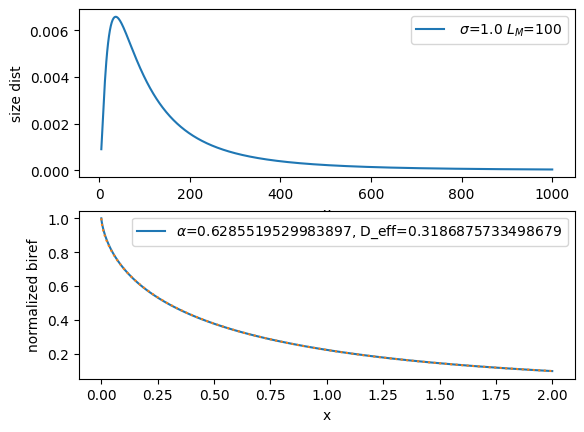

interactive(children=(FloatSlider(value=100.0, description='L median:', max=200.0, min=5.0, step=5.0), FloatSl…

<function __main__.plot_dist_and_fit(L_median=100, sigma=1)>

In [ ]:
# %%

# Function to get user input for the number of lines
def gret_sigma_value():
    while True:
        try:
            sigma = float(input("Enter SIGMA: "))
            if sigma > 0 :
                return sigma
            else:
                print("Please enter a value between 0 and 1.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

# Function to get user input for the function type
def get_LM_type():
    while True:
        try:
            L_median = int(input("Enter L median: "))
            if L_median > 0 :
                return L_median
            else :
                print("Please enter a positive value.")
        except ValueError :
            print("BOOOOOh.")

def plot_dist_and_fit(L_median = 100, sigma = 1 ):
    fig, (ax1, ax2) = plt.subplots( 2,1)
    lengths =  np.linspace(5,1000,1000)
    ar = 15
    #sigma = gret_sigma_value()
    #L_median = get_LM_type()

    L_median = 100


    dist = lognorm_pdf(lengths, sigma, L_median)
    V = np.pi*( (0.5*lengths/ar)**2)*lengths
    eff_dist = V*dist
    eff_dist = eff_dist / sum(eff_dist)


    #### CREATE CURVE

    t = np.linspace(0,2,2000)
    T = 300

    def rot_diff_par(l,AR) :
        
        eta = np.exp(-2.3568+617.2/(T-179.414))*10**-2   #2*10**(-1)	  
        kT = 4.11*10**(-21)/300 * T
        S = np.log(AR+np.sqrt(AR**2-1)) / np.sqrt(AR**2-1)
        A = (3*kT)/(np.pi*eta*l**3)
        G = (0.5*AR**2*( ((2*AR**2-1) / AR)*S-1) ) / (AR**2-1)
        D = A*G
        return D


    D_l = rot_diff_par(lengths*10**(-9),ar)

    # effecctive relax
    exps = []
    for i in range(len(D_l)):
        exps.append(np.exp(-6*D_l[i]*t) )

    w_exps = []
    for i in range(len(eff_dist)) :
        w_exps.append(eff_dist[i]*exps[i])


    relax = []
    somma_exps = 0
    for j in range(len(t)):
        for i in range(len(D_l)):
            somma_exps = somma_exps  + w_exps[i][j]
        relax.append(somma_exps)
        somma_exps = 0

    relax_corrected_EG = relax + 0.1*np.exp(-(6*0.4*t)**0.8)
    relax_corrected_EG = relax_corrected_EG/relax_corrected_EG[0]

    SE, D_eff, alpha = SE_from_TEBcurve(t,relax_corrected_EG)

    ax1.plot(lengths,dist,  label = fr' $ \sigma $={sigma} $L_M$={L_median}' )
    ax2.plot(t,relax_corrected_EG, label = fr'$\alpha$={alpha}, D_eff={D_eff}' )
    ax2.plot(t,SE,':')



    ax2.set_xlabel('x')
    ax2.set_ylabel('normalized biref')
    ax2.legend()


    ax1.set_xlabel('x')
    ax1.set_ylabel('size dist')
    ax1.legend()
    ax1.xlim[0,500]

    plt.show()


# Create interactive widgets
LM_slider = widgets.FloatSlider(value=100, min=5, max=200, step=5, description='L median:')
sigma_slider = widgets.FloatSlider(value=1, min=0.001, max=1, step=0.03, description='sigma:')

# Use interact to create an interactive plot
interact(plot_dist_and_fit, sigma=sigma_slider, L_median=LM_slider)

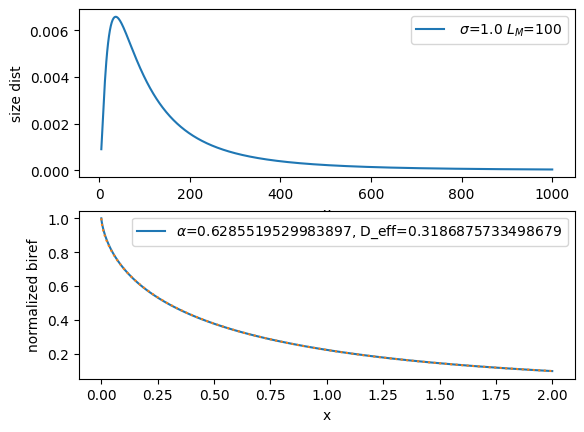

interactive(children=(FloatSlider(value=100.0, description='L median:', max=200.0, min=5.0, step=5.0), FloatSl…

<function __main__.plot_dist_and_fit(L_median=100, sigma=1)>

In [ ]:
# %%

# Function to get user input for the number of lines
def gret_sigma_value():
    while True:
        try:
            sigma = float(input("Enter SIGMA: "))
            if sigma > 0 :
                return sigma
            else:
                print("Please enter a value between 0 and 1.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

# Function to get user input for the function type
def get_LM_type():
    while True:
        try:
            L_median = int(input("Enter L median: "))
            if L_median > 0 :
                return L_median
            else :
                print("Please enter a positive value.")
        except ValueError :
            print("BOOOOOh.")

def plot_dist_and_fit(L_median = 100, sigma = 1 ):
    fig, (ax1, ax2) = plt.subplots( 2,1)
    lengths =  np.linspace(5,1000,1000)
    ar = 15
    #sigma = gret_sigma_value()
    #L_median = get_LM_type()

    L_median = 100


    dist = lognorm_pdf(lengths, sigma, L_median)
    V = np.pi*( (0.5*lengths/ar)**2)*lengths
    eff_dist = V*dist
    eff_dist = eff_dist / sum(eff_dist)


    #### CREATE CURVE

    t = np.linspace(0,2,2000)
    T = 300

    def rot_diff_par(l,AR) :
        
        eta = np.exp(-2.3568+617.2/(T-179.414))*10**-2   #2*10**(-1)	  
        kT = 4.11*10**(-21)/300 * T
        S = np.log(AR+np.sqrt(AR**2-1)) / np.sqrt(AR**2-1)
        A = (3*kT)/(np.pi*eta*l**3)
        G = (0.5*AR**2*( ((2*AR**2-1) / AR)*S-1) ) / (AR**2-1)
        D = A*G
        return D


    D_l = rot_diff_par(lengths*10**(-9),ar)

    # effecctive relax
    exps = []
    for i in range(len(D_l)):
        exps.append(np.exp(-6*D_l[i]*t) )

    w_exps = []
    for i in range(len(eff_dist)) :
        w_exps.append(eff_dist[i]*exps[i])


    relax = []
    somma_exps = 0
    for j in range(len(t)):
        for i in range(len(D_l)):
            somma_exps = somma_exps  + w_exps[i][j]
        relax.append(somma_exps)
        somma_exps = 0

    relax_corrected_EG = relax + 0.1*np.exp(-(6*0.4*t)**0.8)
    relax_corrected_EG = relax_corrected_EG/relax_corrected_EG[0]

    SE, D_eff, alpha = SE_from_TEBcurve(t,relax_corrected_EG)

    ax1.plot(lengths,dist,  label = fr' $ \sigma $={sigma} $L_M$={L_median}' )
    ax2.plot(t,relax_corrected_EG, label = fr'$\alpha$={alpha}, D_eff={D_eff}' )
    ax2.plot(t,SE,':')



    ax2.set_xlabel('x')
    ax2.set_ylabel('normalized biref')
    ax2.legend()


    ax1.set_xlabel('x')
    ax1.set_ylabel('size dist')
    ax1.legend()
    ax1.xlim([0,500])

    plt.show()


# Create interactive widgets
LM_slider = widgets.FloatSlider(value=100, min=5, max=200, step=5, description='L median:')
sigma_slider = widgets.FloatSlider(value=1, min=0.001, max=1, step=0.03, description='sigma:')

# Use interact to create an interactive plot
interact(plot_dist_and_fit, sigma=sigma_slider, L_median=LM_slider)

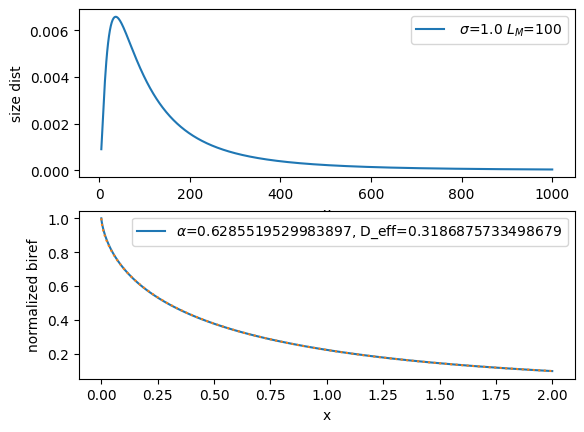

interactive(children=(FloatSlider(value=100.0, description='L median:', max=200.0, min=5.0, step=5.0), FloatSl…

<function __main__.plot_dist_and_fit(L_median=100, sigma=1)>

In [ ]:
# %%

# Function to get user input for the number of lines
def gret_sigma_value():
    while True:
        try:
            sigma = float(input("Enter SIGMA: "))
            if sigma > 0 :
                return sigma
            else:
                print("Please enter a value between 0 and 1.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

# Function to get user input for the function type
def get_LM_type():
    while True:
        try:
            L_median = int(input("Enter L median: "))
            if L_median > 0 :
                return L_median
            else :
                print("Please enter a positive value.")
        except ValueError :
            print("BOOOOOh.")

def plot_dist_and_fit(L_median = 100, sigma = 1 ):
    fig, (ax1, ax2) = plt.subplots( 2,1)
    lengths =  np.linspace(5,1000,1000)
    ar = 15
    #sigma = gret_sigma_value()
    #L_median = get_LM_type()

    L_median = 100


    dist = lognorm_pdf(lengths, sigma, L_median)
    V = np.pi*( (0.5*lengths/ar)**2)*lengths
    eff_dist = V*dist
    eff_dist = eff_dist / sum(eff_dist)


    #### CREATE CURVE

    t = np.linspace(0,2,2000)
    T = 300

    def rot_diff_par(l,AR) :
        
        eta = np.exp(-2.3568+617.2/(T-179.414))*10**-2   #2*10**(-1)	  
        kT = 4.11*10**(-21)/300 * T
        S = np.log(AR+np.sqrt(AR**2-1)) / np.sqrt(AR**2-1)
        A = (3*kT)/(np.pi*eta*l**3)
        G = (0.5*AR**2*( ((2*AR**2-1) / AR)*S-1) ) / (AR**2-1)
        D = A*G
        return D


    D_l = rot_diff_par(lengths*10**(-9),ar)

    # effecctive relax
    exps = []
    for i in range(len(D_l)):
        exps.append(np.exp(-6*D_l[i]*t) )

    w_exps = []
    for i in range(len(eff_dist)) :
        w_exps.append(eff_dist[i]*exps[i])


    relax = []
    somma_exps = 0
    for j in range(len(t)):
        for i in range(len(D_l)):
            somma_exps = somma_exps  + w_exps[i][j]
        relax.append(somma_exps)
        somma_exps = 0

    relax_corrected_EG = relax + 0.1*np.exp(-(6*0.4*t)**0.8)
    relax_corrected_EG = relax_corrected_EG/relax_corrected_EG[0]

    SE, D_eff, alpha = SE_from_TEBcurve(t,relax_corrected_EG)

    ax1.plot(lengths,dist,  label = fr' $ \sigma $={sigma} $L_M$={L_median}' )
    ax2.plot(t,relax_corrected_EG, label = fr'$\alpha$={alpha}, D_eff={D_eff}' )
    ax2.plot(t,SE,':')



    ax2.set_xlabel('x')
    ax2.set_ylabel('normalized biref')
    ax2.legend()


    ax1.set_xlabel('x')
    ax1.set_ylabel('size dist')
    ax1.legend()
    ax1.xlim(0,500)

    plt.show()


# Create interactive widgets
LM_slider = widgets.FloatSlider(value=100, min=5, max=200, step=5, description='L median:')
sigma_slider = widgets.FloatSlider(value=1, min=0.001, max=1, step=0.03, description='sigma:')

# Use interact to create an interactive plot
interact(plot_dist_and_fit, sigma=sigma_slider, L_median=LM_slider)

In [ ]:
# %%

# Function to get user input for the number of lines
def gret_sigma_value():
    while True:
        try:
            sigma = float(input("Enter SIGMA: "))
            if sigma > 0 :
                return sigma
            else:
                print("Please enter a value between 0 and 1.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

# Function to get user input for the function type
def get_LM_type():
    while True:
        try:
            L_median = int(input("Enter L median: "))
            if L_median > 0 :
                return L_median
            else :
                print("Please enter a positive value.")
        except ValueError :
            print("BOOOOOh.")

def plot_dist_and_fit(L_median = 100, sigma = 1 ):
    fig, (ax1, ax2) = plt.subplots( 2,1)
    lengths =  np.linspace(5,1000,1000)
    ar = 15
    #sigma = gret_sigma_value()
    #L_median = get_LM_type()

    L_median = 100


    dist = lognorm_pdf(lengths, sigma, L_median)
    V = np.pi*( (0.5*lengths/ar)**2)*lengths
    eff_dist = V*dist
    eff_dist = eff_dist / sum(eff_dist)


    #### CREATE CURVE

    t = np.linspace(0,2,2000)
    T = 300

    def rot_diff_par(l,AR) :
        
        eta = np.exp(-2.3568+617.2/(T-179.414))*10**-2   #2*10**(-1)	  
        kT = 4.11*10**(-21)/300 * T
        S = np.log(AR+np.sqrt(AR**2-1)) / np.sqrt(AR**2-1)
        A = (3*kT)/(np.pi*eta*l**3)
        G = (0.5*AR**2*( ((2*AR**2-1) / AR)*S-1) ) / (AR**2-1)
        D = A*G
        return D


    D_l = rot_diff_par(lengths*10**(-9),ar)

    # effecctive relax
    exps = []
    for i in range(len(D_l)):
        exps.append(np.exp(-6*D_l[i]*t) )

    w_exps = []
    for i in range(len(eff_dist)) :
        w_exps.append(eff_dist[i]*exps[i])


    relax = []
    somma_exps = 0
    for j in range(len(t)):
        for i in range(len(D_l)):
            somma_exps = somma_exps  + w_exps[i][j]
        relax.append(somma_exps)
        somma_exps = 0

    relax_corrected_EG = relax + 0.1*np.exp(-(6*0.4*t)**0.8)
    relax_corrected_EG = relax_corrected_EG/relax_corrected_EG[0]

    SE, D_eff, alpha = SE_from_TEBcurve(t,relax_corrected_EG)

    ax1.plot(lengths[0:500],dist[0:500],  label = fr' $ \sigma $={sigma} $L_M$={L_median}' )
    ax2.plot(t,relax_corrected_EG, label = fr'$\alpha$={alpha}, D_eff={D_eff}' )
    ax2.plot(t,SE,':')



    ax2.set_xlabel('x')
    ax2.set_ylabel('normalized biref')
    ax2.legend()


    ax1.set_xlabel('x')
    ax1.set_ylabel('size dist')
    ax1.legend()
    

    plt.show()


# Create interactive widgets
LM_slider = widgets.FloatSlider(value=100, min=5, max=200, step=5, description='L median:')
sigma_slider = widgets.FloatSlider(value=1, min=0.001, max=1, step=0.03, description='sigma:')

# Use interact to create an interactive plot
interact(plot_dist_and_fit, sigma=sigma_slider, L_median=LM_slider)

interactive(children=(FloatSlider(value=100.0, description='L median:', max=200.0, min=5.0, step=5.0), FloatSl…

<function __main__.plot_dist_and_fit(L_median=100, sigma=1)>

In [ ]:
# %%

# Function to get user input for the number of lines
def gret_sigma_value():
    while True:
        try:
            sigma = float(input("Enter SIGMA: "))
            if sigma > 0 :
                return sigma
            else:
                print("Please enter a value between 0 and 1.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

# Function to get user input for the function type
def get_LM_type():
    while True:
        try:
            L_median = int(input("Enter L median: "))
            if L_median > 0 :
                return L_median
            else :
                print("Please enter a positive value.")
        except ValueError :
            print("BOOOOOh.")

def plot_dist_and_fit(L_median = 100, sigma = 1 ):
    fig, (ax1, ax2) = plt.subplots( 2,1)
    lengths =  np.linspace(5,1000,1000)
    ar = 15
    #sigma = gret_sigma_value()
    #L_median = get_LM_type()

    L_median = 100


    dist = lognorm_pdf(lengths, sigma, L_median)
    V = np.pi*( (0.5*lengths/ar)**2)*lengths
    eff_dist = V*dist
    eff_dist = eff_dist / sum(eff_dist)


    #### CREATE CURVE

    t = np.linspace(0,2,2000)
    T = 300

    def rot_diff_par(l,AR) :
        
        eta = np.exp(-2.3568+617.2/(T-179.414))*10**-2   #2*10**(-1)	  
        kT = 4.11*10**(-21)/300 * T
        S = np.log(AR+np.sqrt(AR**2-1)) / np.sqrt(AR**2-1)
        A = (3*kT)/(np.pi*eta*l**3)
        G = (0.5*AR**2*( ((2*AR**2-1) / AR)*S-1) ) / (AR**2-1)
        D = A*G
        return D


    D_l = rot_diff_par(lengths*10**(-9),ar)

    # effecctive relax
    exps = []
    for i in range(len(D_l)):
        exps.append(np.exp(-6*D_l[i]*t) )

    w_exps = []
    for i in range(len(eff_dist)) :
        w_exps.append(eff_dist[i]*exps[i])


    relax = []
    somma_exps = 0
    for j in range(len(t)):
        for i in range(len(D_l)):
            somma_exps = somma_exps  + w_exps[i][j]
        relax.append(somma_exps)
        somma_exps = 0

    relax_corrected_EG = relax + 0.1*np.exp(-(6*0.4*t)**0.8)
    relax_corrected_EG = relax_corrected_EG/relax_corrected_EG[0]

    SE, D_eff, alpha = SE_from_TEBcurve(t,relax_corrected_EG)

    ax1.plot(lengths[0:500],dist[0:500],  label = fr' $ \sigma $={sigma} $L_M$={L_median}' )
    ax2.plot(t,relax_corrected_EG, label = fr'$\alpha$={alpha}, D_eff={D_eff}' )
    ax2.plot(t,SE,':')



    ax2.set_xlabel('x')
    ax2.set_ylabel('normalized biref')
    ax2.legend()


    ax1.set_xlabel('x')
    ax1.set_ylabel('size dist')
    ax1.legend()
    

    plt.show()


# Create interactive widgets
LM_slider = widgets.FloatSlider(value=100, min=5, max=500, step=5, description='L median:')
sigma_slider = widgets.FloatSlider(value=1, min=0.001, max=1, step=0.03, description='sigma:')

# Use interact to create an interactive plot
interact(plot_dist_and_fit, sigma=sigma_slider, L_median=LM_slider)

interactive(children=(FloatSlider(value=100.0, description='L median:', max=500.0, min=5.0, step=5.0), FloatSl…

<function __main__.plot_dist_and_fit(L_median=100, sigma=1)>

In [ ]:
# %%

# Function to get user input for the number of lines
def gret_sigma_value():
    while True:
        try:
            sigma = float(input("Enter SIGMA: "))
            if sigma > 0 :
                return sigma
            else:
                print("Please enter a value between 0 and 1.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

# Function to get user input for the function type
def get_LM_type():
    while True:
        try:
            L_median = int(input("Enter L median: "))
            if L_median > 0 :
                return L_median
            else :
                print("Please enter a positive value.")
        except ValueError :
            print("BOOOOOh.")

def plot_dist_and_fit(L_median = 100, sigma = 1 ):
    fig, (ax1, ax2) = plt.subplots( 2,1)
    lengths =  np.linspace(5,1000,1000)
    ar = 15
    #sigma = gret_sigma_value()
    #L_median = get_LM_type()

    L_median = 100


    dist = lognorm_pdf(lengths, sigma, L_median)
    V = np.pi*( (0.5*lengths/ar)**2)*lengths
    eff_dist = V*dist
    eff_dist = eff_dist / sum(eff_dist)


    #### CREATE CURVE

    t = np.linspace(0,2,2000)
    T = 300

    def rot_diff_par(l,AR) :
        
        eta = np.exp(-2.3568+617.2/(T-179.414))*10**-2   #2*10**(-1)	  
        kT = 4.11*10**(-21)/300 * T
        S = np.log(AR+np.sqrt(AR**2-1)) / np.sqrt(AR**2-1)
        A = (3*kT)/(np.pi*eta*l**3)
        G = (0.5*AR**2*( ((2*AR**2-1) / AR)*S-1) ) / (AR**2-1)
        D = A*G
        return D


    D_l = rot_diff_par(lengths*10**(-9),ar)

    # effecctive relax
    exps = []
    for i in range(len(D_l)):
        exps.append(np.exp(-6*D_l[i]*t) )

    w_exps = []
    for i in range(len(eff_dist)) :
        w_exps.append(eff_dist[i]*exps[i])


    relax = []
    somma_exps = 0
    for j in range(len(t)):
        for i in range(len(D_l)):
            somma_exps = somma_exps  + w_exps[i][j]
        relax.append(somma_exps)
        somma_exps = 0

    relax_corrected_EG = relax + 0.1*np.exp(-(6*0.4*t)**0.8)
    relax_corrected_EG = relax_corrected_EG/relax_corrected_EG[0]

    SE, D_eff, alpha = SE_from_TEBcurve(t,relax_corrected_EG)

    ax1.plot(lengths[0:500],dist[0:500],  label = fr' $ \sigma $={sigma} $L_M$={L_median}' )
    ax2.plot(t,relax_corrected_EG, label = fr'$\alpha$={alpha}, D_eff={D_eff}' )
    ax2.plot(t,SE,':')



    ax2.set_xlabel('x')
    ax2.set_ylabel('normalized biref')
    ax2.legend()


    ax1.set_xlabel('x')
    ax1.set_ylabel('size dist')
    ax1.legend()
    

    plt.show()


# Create interactive widgets
LM_slider = widgets.FloatSlider(value=200, min=5, max=500, step=5, description='L median:')
sigma_slider = widgets.FloatSlider(value=1, min=0.001, max=1, step=0.03, description='sigma:')

# Use interact to create an interactive plot
interact(plot_dist_and_fit, sigma=sigma_slider, L_median=LM_slider)

interactive(children=(FloatSlider(value=200.0, description='L median:', max=500.0, min=5.0, step=5.0), FloatSl…

<function __main__.plot_dist_and_fit(L_median=100, sigma=1)>

In [ ]:
# %%

# Function to get user input for the number of lines
def gret_sigma_value():
    while True:
        try:
            sigma = float(input("Enter SIGMA: "))
            if sigma > 0 :
                return sigma
            else:
                print("Please enter a value between 0 and 1.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

# Function to get user input for the function type
def get_LM_type():
    while True:
        try:
            L_median = int(input("Enter L median: "))
            if L_median > 0 :
                return L_median
            else :
                print("Please enter a positive value.")
        except ValueError :
            print("BOOOOOh.")

def plot_dist_and_fit(L_median = 100, sigma = 1 ):
    fig, (ax1, ax2) = plt.subplots( 2,1)
    lengths =  np.linspace(5,1000,1000)
    ar = 15
    #sigma = gret_sigma_value()
    #L_median = get_LM_type()




    dist = lognorm_pdf(lengths, sigma, L_median)
    V = np.pi*( (0.5*lengths/ar)**2)*lengths
    eff_dist = V*dist
    eff_dist = eff_dist / sum(eff_dist)


    #### CREATE CURVE

    t = np.linspace(0,2,2000)
    T = 300

    def rot_diff_par(l,AR) :
        
        eta = np.exp(-2.3568+617.2/(T-179.414))*10**-2   #2*10**(-1)	  
        kT = 4.11*10**(-21)/300 * T
        S = np.log(AR+np.sqrt(AR**2-1)) / np.sqrt(AR**2-1)
        A = (3*kT)/(np.pi*eta*l**3)
        G = (0.5*AR**2*( ((2*AR**2-1) / AR)*S-1) ) / (AR**2-1)
        D = A*G
        return D


    D_l = rot_diff_par(lengths*10**(-9),ar)

    # effecctive relax
    exps = []
    for i in range(len(D_l)):
        exps.append(np.exp(-6*D_l[i]*t) )

    w_exps = []
    for i in range(len(eff_dist)) :
        w_exps.append(eff_dist[i]*exps[i])


    relax = []
    somma_exps = 0
    for j in range(len(t)):
        for i in range(len(D_l)):
            somma_exps = somma_exps  + w_exps[i][j]
        relax.append(somma_exps)
        somma_exps = 0

    relax_corrected_EG = relax + 0.1*np.exp(-(6*0.4*t)**0.8)
    relax_corrected_EG = relax_corrected_EG/relax_corrected_EG[0]

    SE, D_eff, alpha = SE_from_TEBcurve(t,relax_corrected_EG)

    ax1.plot(lengths[0:500],dist[0:500],  label = fr' $ \sigma $={sigma} $L_M$={L_median}' )
    ax2.plot(t,relax_corrected_EG, label = fr'$\alpha$={alpha}, D_eff={D_eff}' )
    ax2.plot(t,SE,':')



    ax2.set_xlabel('x')
    ax2.set_ylabel('normalized biref')
    ax2.legend()


    ax1.set_xlabel('x')
    ax1.set_ylabel('size dist')
    ax1.legend()
    

    plt.show()


# Create interactive widgets
LM_slider = widgets.FloatSlider(value=200, min=5, max=500, step=5, description='L median:')
sigma_slider = widgets.FloatSlider(value=1, min=0.001, max=1, step=0.03, description='sigma:')

# Use interact to create an interactive plot
interact(plot_dist_and_fit, sigma=sigma_slider, L_median=LM_slider)

interactive(children=(FloatSlider(value=200.0, description='L median:', max=500.0, min=5.0, step=5.0), FloatSl…

<function __main__.plot_dist_and_fit(L_median=100, sigma=1)>